## Will the bill make it through capitol hill? Lobbying Datasets (OpenSecrets)

In [2]:
import os
import csv
import pandas as pd
import numpy as np
import re # Import re for regular expressions
from functools import reduce
import re

In [ ]:
# Set the working directory
p = r"C:/Users/saram/Desktop/Erdos_Institute/project-2025/lobby-data"

## Read the Lobbying Data
### Read the Lobbying dataset

[OpenSecrets Data Definitions for Lobbying Data: Lobbying](https://dkftve4js3etk.cloudfront.net/datadictionary/Data%20Dictionary%20lob_lobbying.htm)

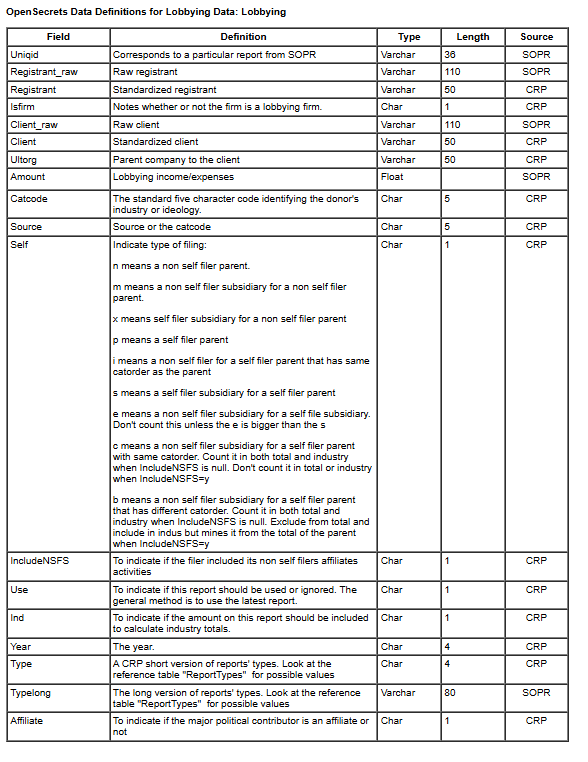

In [3]:

file_path = r"C:\Users\saram\Desktop\Erdos_Institute\project-2025\lobby-data\lob_lobbying.txt"

columns = [
    "uniqid","registrant_raw","registrant","isfirm","client_raw","client","ultorg",
    "amount","catcode","source","self","include_nsfs","use","ind","year","type",
    "typelong","affiliate"
]

lobbying = pd.read_csv(
    file_path,
    sep=",",                 # real delimiter
    header=None,             # no header row in file
    names=columns,           # OpenSecrets dictionary
    dtype=str,
    encoding="latin-1",
    quotechar="|",           # text wrapped in | ... | contains commas
    quoting=csv.QUOTE_MINIMAL,
    escapechar="\\",
    low_memory=False
)

# basic cleanup
lobbying = lobbying.applymap(lambda x: x.strip() if isinstance(x, str) else x)
lobbying["amount"] = pd.to_numeric(lobbying["amount"], errors="coerce")
lobbying["year"]   = lobbying["year"].astype(str)

print(lobbying.shape)
lobbying

C:\Users\saram\AppData\Local\Temp\ipykernel_16952\4004166890.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  lobbying = lobbying.applymap(lambda x: x.strip() if isinstance(x, str) else x)


(1544012, 18)


,uniqid,registrant_raw,registrant,isfirm,client_raw,client,ultorg,amount,catcode,source,self,include_nsfs,use,ind,year,type,typelong,affiliate
0,82c5f661-a637-45ad-a3a6-b5ba18cf8962,ASTRAZENECA PHARMACEUTICALS LP,AstraZeneca Pharmaceuticals,NaN,ASTRAZENECA PHARMACEUTICALS LP,AstraZeneca Pharmaceuticals,AstraZeneca PLC,1370000.0,H4300,pac,x,,y,y,2021,q4a,FOURTH QUARTER AMENDMENT,NaN
1,84ad3a9e-5864-4227-a802-e268fbf37237,"DAVID L. HORNE, LLC",David L Horne LLC,y,MULTIFAMILY LENDERS COUNCIL,Multifamily Lenders Council,Multifamily Lenders Council,15000.0,F4600,wda16,n,,y,y,2021,q4,FOURTH QUARTER REPORT,NaN
2,85b111b1-5d2e-4107-bc24-0921316e29a5,ECHELON GOVERNMENT AFFAIRS,Echelon Government Affairs,y,THE ALBERS GROUP,Albers Group,Albers Group,10000.0,Y4000,,n,,y,y,2021,q4,FOURTH QUARTER REPORT,NaN
3,87822a14-12de-478c-a34d-010fa503e539,WTA -- ADVOCATES FOR RURAL BROADBAND,Western Telecommunications Alliance,NaN,WTA -- ADVOCATES FOR RURAL BROADBAND,Western Telecommunications Alliance,Western Telecommunications Alliance,75000.0,C4000,pac,p,,y,y,2021,q4,FOURTH QUARTER REPORT,NaN
4,87ff989d-9d12-4fef-84ef-ab69cd616894,FINANCIAL EXECUTIVES INTERNATIONAL,Financial Executives International,NaN,FINANCIAL EXECUTIVES INTERNATIONAL,Financial Executives International,Financial Executives International,21650.0,F5000,Hvr06,p,,y,y,2021,q4,FOURTH QUARTER REPORT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544007,0854dd96-ed91-4219-99d9-b84bf06ee2f8,AMERICAN EXPRESS COMPANY,American Express,NaN,AMERICAN EXPRESS COMPANY,American Express,American Express,440000.0,F1400,PAC,p,,y,y,2022,q4,FOURTH QUARTER REPORT,NaN
1544008,086b65ba-0abe-4ed0-a3e9-a66c9ecc96a3,"BL PARTNERS GROUP, LLC",BL Partners Group,y,CTIA - THE WIRELESS ASSOCIATION,CTIA,CTIA,30000.0,C4300,pac,i,,y,,2022,q4,FOURTH QUARTER REPORT,NaN
1544009,b01b51ba-d426-4750-ad00-0ea3c5aa2317,VECTIS DC,Vectis DC,y,"CITY OF MONTEBELLO, CALIFORNIA","City of Montebello, CA","City of Montebello, CA",20000.0,X3000,Name,n,,y,y,2022,q4,FOURTH QUARTER REPORT,NaN
1544010,b0235c16-0a34-4e06-be62-f42a3bf52d6a,"THE NICKLES GROUP, LLC",Nickles Group,y,WALMART INC,Walmart Inc,Walmart Inc,80000.0,G4300,pac,i,,y,,2022,q4,FOURTH QUARTER REPORT,NaN


### Read the Lobbyists dataset

[OpenSecrets Data Definitions for Lobbying Data: Lobbyists](https://dkftve4js3etk.cloudfront.net/datadictionary/Data%20Dictionary%20lob_lobbyists.htm)

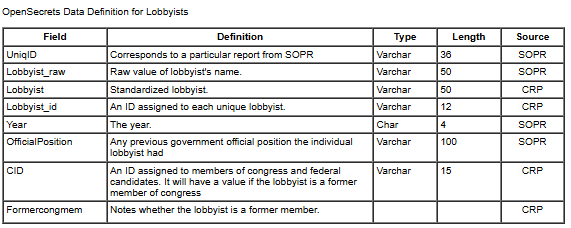

In [4]:
file_path = r"C:\Users\saram\Desktop\Erdos_Institute\project-2025\lobby-data\lob_lobbyist.txt"

columns = [
    "uniqid","lobbyist_raw","lobbyist","lobbyist_id","year","official_position","cid","formercongmen"
    ]

lobbyists = pd.read_csv(
    file_path,
    sep=",",
    header=None,
    names=columns,
    dtype=str,
    encoding="latin-1",
    engine="python",           # tolerant tokenizer
    quotechar="|",
    quoting=csv.QUOTE_MINIMAL,
    escapechar="\\",
    skipinitialspace=True,
    on_bad_lines="warn",       # log malformed rows
    usecols=list(range(len(columns)))  # ignore any overflow fields
)

# normalize
lobbyists = lobbyists.applymap(lambda x: x.strip("|").strip() if isinstance(x, str) else x)

print(lobbyists.shape)
lobbyists

C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3566382922.py:7: ParserWarning: Skipping line 116688: ',' expected after '|'

  lobbyists = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3566382922.py:7: ParserWarning: Skipping line 902515: ',' expected after '|'

  lobbyists = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3566382922.py:7: ParserWarning: Skipping line 987425: ',' expected after '|'

  lobbyists = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3566382922.py:7: ParserWarning: Skipping line 1181630: ',' expected after '|'

  lobbyists = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3566382922.py:7: ParserWarning: Skipping line 1201961: ',' expected after '|'

  lobbyists = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3566382922.py:7: ParserWarning: Skipping line 1548777: ',' expected after '|'

  lobbyists = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3566382922.py:7: 

(3475149, 8)


,uniqid,lobbyist_raw,lobbyist,lobbyist_id,year,official_position,cid,formercongmen
0,06C29C84-250F-478B-872A-2F647D9DC044,"O'BRIEN, LAWRENCE F. III","O'Brien, Lawrence F III",Y0000046486L,2004,NaN,NaN,n
1,3A22C685-EC94-46AA-9C45-4AA4A7044C28,"BRAGG, PATRICIA DUNMIRE","Bragg, Patricia Dunmire",Y0000020554L,2001,NaN,NaN,n
2,5CBE61EC-87F1-401E-9D57-620975C9A1F8,"COSTELLO, RYAN","Costello, Ryan",Y0000027292L,2002,NaN,N00031064,y
3,8D1DB726-0BE9-46C1-AADE-BE8BCAFF929F,"SMITH, G. WAYNE","Smith, G Wayne",Y0000027005L,2004,NaN,NaN,n
4,EF5095CF-92E6-49BE-A40D-35E6464EA394,"SCHMITZ, JOHN P.","Schmitz, John P",Y0000019948L,2002,NaN,NaN,n
...,...,...,...,...,...,...,...,...
3475144,fa2e5ac1-1463-40b7-8f2b-7769134fc4b6,"ADAIR, JOHN LUCAS","Adair, Lucas",YX000058147L,2023,NaN,NaN,n
3475145,fa2e5ac1-1463-40b7-8f2b-7769134fc4b6,"GARFINKEL, ANDREW","Garfinkel, Andrew",Y0000008935L,2023,NaN,NaN,n
3475146,fa2e5ac1-1463-40b7-8f2b-7769134fc4b6,"KATZ, ALAN M","Katz, Alan",Y0000052389L,2023,NaN,NaN,n
3475147,fa2e5ac1-1463-40b7-8f2b-7769134fc4b6,"KELLER, THOMAS","Keller, Thomas C",Y0000017161L,2023,NaN,NaN,n


### Read the Lobby industries dataset

[OpenSecrets Data Definitions for Lobbying Data: Lobby industries](https://dkftve4js3etk.cloudfront.net/datadictionary/Data%20Dictionary%20lob_indus.htm)

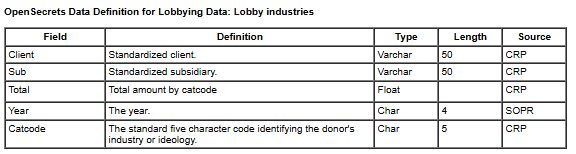

In [5]:
file_path = r"C:\Users\saram\Desktop\Erdos_Institute\project-2025\lobby-data\lob_indus.txt"

columns = [
    "client","sub","total","year","catcode"
    ]

industries = pd.read_csv(
    file_path,
    sep=",",
    header=None,
    names=columns,
    dtype=str,
    encoding="latin-1",
    engine="python",           # tolerant tokenizer
    quotechar="|",
    quoting=csv.QUOTE_MINIMAL,
    escapechar="\\",
    skipinitialspace=True,
    on_bad_lines="warn",       # log malformed rows
    usecols=list(range(len(columns)))  # ignore any overflow fields
)

# normalize
industries = industries.applymap(lambda x: x.strip("|").strip() if isinstance(x, str) else x)
industries["total"] = pd.to_numeric(industries["total"], errors="coerce")

print(industries.shape)
industries

C:\Users\saram\AppData\Local\Temp\ipykernel_16952\616600185.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  industries = industries.applymap(lambda x: x.strip("|").strip() if isinstance(x, str) else x)


(309730, 5)


,client,sub,total,year,catcode
0,National Assn for County Community & Econ Develop,National Assn for County Community & Econ Develop,0,1998,X3000
1,Fox Valley Technical College,Fox Valley Technical College,80000,2015,H5200
2,Employers Cncl on Flexible Compensation,Employers Cncl on Flexible Compensation,580000,2001,J9000
3,American Federation of TV/Radio Artists,American Federation of TV/Radio Artists,30000,2011,LG400
4,Visiting Nurse Assn of America,Visiting Nurse Assn/Manchester & S NH,40000,2005,H3100
...,...,...,...,...,...
309725,Kaman Corp,Kaman Aerospace,80000,2003,T1200
309726,Kaman Corp,Kaman Aerospace,80000,2004,T1200
309727,Kaman Corp,Kaman Aerospace,20000,2005,T1200
309728,Kaman Corp,Kaman Aerospace,20000,2006,T1200


### Read the Lobby agencies dataset

[OpenSecrets Data Definitions for Lobbying Data: Lobby agencies](https://dkftve4js3etk.cloudfront.net/datadictionary/Data%20Dictionary%20lob_agency.htm)

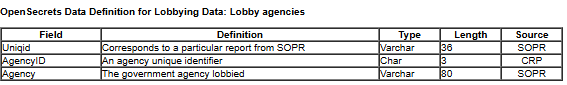

In [6]:
file_path = r"C:\Users\saram\Desktop\Erdos_Institute\project-2025\lobby-data\lob_agency.txt"

columns = [
    "uniqid","agencyid","agency"
    ]

agencies = pd.read_csv(
    file_path,
    sep=",",
    header=None,
    names=columns,
    dtype=str,
    encoding="latin-1",
    engine="python",           # tolerant tokenizer
    quotechar="|",
    quoting=csv.QUOTE_MINIMAL,
    escapechar="\\",
    skipinitialspace=True,
    on_bad_lines="warn",       # log malformed rows
    usecols=list(range(len(columns)))  # ignore any overflow fields
)

# normalize
agencies = agencies.applymap(lambda x: x.strip("|").strip() if isinstance(x, str) else x)

print(agencies.shape)
agencies

C:\Users\saram\AppData\Local\Temp\ipykernel_16952\2502701586.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  agencies = agencies.applymap(lambda x: x.strip("|").strip() if isinstance(x, str) else x)


(4097763, 3)


,uniqid,agencyid,agency
0,BB7367A7-7B60-4DED-AA2D-A94771A9EBE8,001,US Senate
1,BB7367A7-7B60-4DED-AA2D-A94771A9EBE8,002,US House of Representatives
2,04366C6F-B0CE-4C28-87BF-EE1CC8A9BB41,002,US House of Representatives
3,04366C6F-B0CE-4C28-87BF-EE1CC8A9BB41,034,Dept of Health & Human Services
4,04366C6F-B0CE-4C28-87BF-EE1CC8A9BB41,134,Centers for Disease Control & Prevention
...,...,...,...
4097758,2efcb77e-4c7a-433c-8559-b9df48db3782,002,US House of Representatives
4097759,2f702749-ef71-471d-800f-de6149bad184,201,Dept of Homeland Security
4097760,3057976c-a668-4957-ab7f-a8bb559fa6aa,064,Federal Trade Commission
4097761,3058e662-c783-4c63-90d3-f585624871d0,036,Dept of the Interior


### Read the Lobby issues dataset

[OpenSecrets Data Definition for Lobbying Data: Lobby issues](https://dkftve4js3etk.cloudfront.net/datadictionary/Data%20Dictionary%20lob_issues.htm)

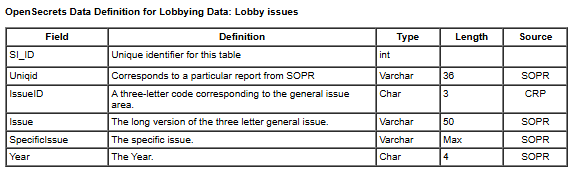

In [7]:
file_path = r"C:\Users\saram\Desktop\Erdos_Institute\project-2025\lobby-data\lob_issue.txt"

columns = [
    "si_id","uniqid","issueid", "issue", "specificissue", "year"
    ]

issues = pd.read_csv(
    file_path,
    sep=",",
    header=None,
    names=columns,
    dtype=str,
    encoding="latin-1",
    engine="python",           # tolerant tokenizer
    quotechar="|",
    quoting=csv.QUOTE_MINIMAL,
    escapechar="\\",
    skipinitialspace=True,
    on_bad_lines="warn",       # log malformed rows
    usecols=list(range(len(columns)))  # ignore any overflow fields
)

# normalize
issues = issues.applymap(lambda x: x.strip("|").strip() if isinstance(x, str) else x)
issues["year"] = pd.to_numeric(issues["year"], errors="coerce")

print(issues.shape)
issues

C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3192214668.py:7: ParserWarning: Skipping line 47467: ',' expected after '|'

  issues = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3192214668.py:7: ParserWarning: Skipping line 100045: ',' expected after '|'

  issues = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3192214668.py:7: ParserWarning: Skipping line 124421: ',' expected after '|'

  issues = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3192214668.py:7: ParserWarning: Skipping line 446204: ',' expected after '|'

  issues = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3192214668.py:7: ParserWarning: Skipping line 1067527: ',' expected after '|'

  issues = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3192214668.py:7: ParserWarning: Skipping line 1733673: ',' expected after '|'

  issues = pd.read_csv(
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3192214668.py:7: ParserWarning: Skipp

(3009850, 6)


,si_id,uniqid,issueid,issue,specificissue,year
0,3001624,02e92bd6-0159-495e-9d00-8a490a0be8be,DIS,Disaster & Emergency Planning,Issues affecting manufacturer of railroad and ...,2022
1,3001625,02e92bd6-0159-495e-9d00-8a490a0be8be,ENV,Environment & Superfund,Issues affecting manufacturer of railroad and ...,2022
2,3001626,02e92bd6-0159-495e-9d00-8a490a0be8be,LBR,"Labor, Antitrust & Workplace",Issues affecting manufacturer of railroad and ...,2022
3,3001627,02e92bd6-0159-495e-9d00-8a490a0be8be,ROD,Roads & Highways,Issues affecting manufacturer of railroad and ...,2022
4,3001628,02e92bd6-0159-495e-9d00-8a490a0be8be,RRR,Railroads,Issues affecting manufacturer of railroad and ...,2022
...,...,...,...,...,...,...
3009845,3076640,0a62db56-bdc4-4f4c-9329-5b420066f53c,SMB,Small Business,Women's Business Center program reauthorizatio...,2022
3009846,3076641,0a6de630-f472-4dc2-a796-b58d67831573,DEF,Defense,Issues related to tungsten manufacturing,2022
3009847,3076642,0a7f2d03-7d7a-450c-b20a-a48c0fa93e92,AUT,Automotive Industry,Issues related to autonomous vehicles Cybersec...,2022
3009848,3076643,0a7f2d03-7d7a-450c-b20a-a48c0fa93e92,BAN,Banking,Financial services issues Industrial loan bank...,2022


### Read the Lobby bills dataset

[OpenSecrets Data Definition for Lobbying Data: Lobby bills](https://dkftve4js3etk.cloudfront.net/datadictionary/Data%20Dictionary%20lob_bills.htm)

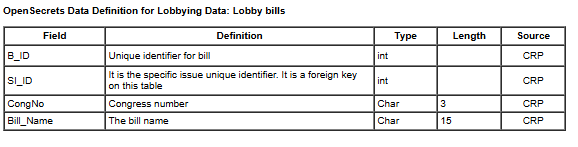

In [8]:
file_path = r"C:\Users\saram\Desktop\Erdos_Institute\project-2025\lobby-data\lob_bills.txt"

columns = [
    "b_id","si_id", "congno", "bill_name"
    ]

bills = pd.read_csv(
    file_path,
    sep=",",
    header=None,
    names=columns,
    dtype=str,
    encoding="latin-1",
    engine="python",           # tolerant tokenizer
    quotechar="|",
    quoting=csv.QUOTE_MINIMAL,
    escapechar="\\",
    skipinitialspace=True,
    on_bad_lines="warn",       # log malformed rows
    usecols=list(range(len(columns)))  # ignore any overflow fields
)

# normalize
bills = bills.applymap(lambda x: x.strip("|").strip() if isinstance(x, str) else x)

print(bills.shape)
bills

C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3972678814.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bills = bills.applymap(lambda x: x.strip("|").strip() if isinstance(x, str) else x)


(7262028, 4)


,b_id,si_id,congno,bill_name
0,s1461-117,2820018,117,S.1461
1,hr463-117,2820018,117,H.R.463
2,s910-116,2820035,116,S.910
3,hr2405-116,2820035,116,H.R.2405
4,hr3816-117,2820067,117,H.R.3816
...,...,...,...,...
7262023,s1169-117,3048344,117,S.1169
7262024,hr4521-117,3048344,117,H.R.4521
7262025,hr7072-117,3048361,117,H.R.7072
7262026,s4373-117,3048361,117,S.4373


## Read the Reference Data

In [9]:
file_path = r"C:\Users\saram\Desktop\Erdos_Institute\project-2025\lobby-data"

# specify engine='xlrd' to read .xls files
crp_ids = pd.read_excel(file_path + r"\CRP_IDs.xls", dtype=str, engine="xlrd")

print(crp_ids.shape)
crp_ids

(11900, 6)


,CID,CRPName,Party,DistIDRunFor,FECCandID,Year
0,N00048815,"Aadland, Erik",R,CO07,H2CO07170,2024
1,N00034296,"Aalders, Tim",R,UT03,H2UT03280,2024
2,N00047923,"Aazami, Shervin",D,CA32,H2CA30291,2024
3,N00051397,"Abahsain, Jill",D,MN07,H2MN07162,2024
4,N00051715,"Abbott, Martha",3,VTS2,S2VT00359,2024
...,...,...,...,...,...,...
11895,N00046429,"Zmich, Thomas",R,NY06,H0NY06086,2020
11896,N00043139,"Zorn, Steve",D,CO07,H8CO07110,2020
11897,N00044226,"Zornio, Trish",D,COS2,S0CO00450,2020
11898,N00045620,"Zunker, Tricia",D,WI07,H0WI07135,2020


In [10]:
file_path = r"C:\Users\saram\Desktop\Erdos_Institute\project-2025\lobby-data"

cats = pd.read_csv(file_path + r"\CRP_Categories.txt", sep="\t", dtype=str)
print(cats.shape)
cats

(485, 6)


,Catcode,Catname,Catorder,Industry,Sector,Sector Long
0,A0000,Agriculture,A11,Misc Agriculture,Agribusiness,Agribusiness
1,A1000,Crop production & basic processing,A01,Crop Production & Basic Processing,Agribusiness,Agribusiness
2,A1100,Cotton,A01,Crop Production & Basic Processing,Agribusiness,Agribusiness
3,A1200,Sugar cane & sugar beets,A01,Crop Production & Basic Processing,Agribusiness,Agribusiness
4,A1300,Tobacco & Tobacco products,A02,Tobacco,Agribusiness,Agribusiness
...,...,...,...,...,...,...
480,Z9500,Transfer from intermediary (type 24I or 24T),Z09,Non-contribution,Party/Non-contribs,Party/Non-Contribution
481,Z9600,"Non-Contribution, Miscellaneous",Z09,Non-contribution,Party/Non-contribs,Party/Non-Contribution
482,Z9700,Unitemized (small) contributions,Z09,Non-contribution,Party/Non-contribs,Party/Non-Contribution
483,Z9800,Public Funding,Z09,Non-contribution,Party/Non-contribs,Party/Non-Contribution


## Merge together (all data)


In [11]:
# Normalize minimal columns and case
for df in [lobbying, lobbyists, issues, bills, agencies, cats]:
    df.columns = [c.strip().lower() for c in df.columns]

In [12]:
# per-uniqid aggregates
# Lobbyists
lob_agg = (lobbyists
    .groupby("uniqid", dropna=False)
    .agg(
        n_lobbyists=("lobbyist_id", "nunique"),
        n_former_members=("formercongmen", lambda s: (s == "y").sum() if s.notna().any() else 0),
        lobbyist_names=("lobbyist", lambda s: "|".join(sorted(set(x for x in s.dropna().astype(str) if x)))),
    )
    .reset_index()
)

KeyboardInterrupt: 

In [ ]:
# Issues
iss_agg = (issues
    .groupby("uniqid", dropna=False)
    .agg(
        n_issues=("si_id", "nunique"),
        issue_ids=("issueid", lambda s: "|".join(sorted(set(s.dropna().astype(str))))),
        specific_issues=("specificissue", lambda s: "|".join(sorted(set(x for x in s.dropna().astype(str) if x)))),
    )
    .reset_index()
)

In [ ]:
# Bills via SI_ID
ib = bills.merge(issues[["si_id","uniqid"]], on="si_id", how="left")
bill_agg = (ib
    .groupby("uniqid", dropna=False)
    .agg(
        n_bills=("b_id", "nunique"),
        bills=("bill_name", lambda s: "|".join(sorted(set(s.dropna().astype(str))))),
        congresses=("congno",  lambda s: "|".join(sorted(set(s.dropna().astype(str)))))
    )
    .reset_index()
)

In [ ]:
# Agencies
ag_agg = (agencies
    .groupby("uniqid", dropna=False)
    .agg(
        n_agencies=("agencyid", "nunique"),
        agencies=("agency", lambda s: "|".join(sorted(set(s.dropna().astype(str)))))
    )
    .reset_index()
)

In [ ]:
# Category labels (join on catcode)
cats = cats.rename(columns={"catcode":"catcode"})
cat_cols = list(cats.columns)

In [ ]:
# Assemble “all_data” wide table
all_data = lobbying.copy()
all_data = all_data.merge(lob_agg, on="uniqid", how="left")
all_data = all_data.merge(iss_agg, on="uniqid", how="left")
all_data = all_data.merge(bill_agg, on="uniqid", how="left")
all_data = all_data.merge(ag_agg, on="uniqid", how="left")
all_data = all_data.merge(cats, on="catcode", how="left")  # adds industry metadata
all_data

In [ ]:
print(all_data.shape)

In [ ]:
print(all_data.columns)

In [ ]:
# candidate info per filing
crp_ids.columns = crp_ids.columns.str.lower()

# attach candidate rows to lobbyists via cid
lob_with_cids = lobbyists.merge(
    crp_ids[["cid","crpname","party","distidrunfor","feccandid","year"]],
    on="cid", how="left"
)

# aggregate to uniqid
cand_agg = (lob_with_cids.groupby("uniqid", dropna=False)
    .agg(
        n_lobbyists_with_cid=("cid", lambda s: s.notna().sum()),
        parties=("party", lambda s: "|".join(sorted(set(s.dropna().astype(str))))),
        candidate_names=("crpname", lambda s: "|".join(sorted(set(s.dropna().astype(str))))),
    )
    .reset_index()
)

all_data = all_data.merge(cand_agg, on="uniqid", how="left")
all_data[["n_lobbyists_with_cid"]] = all_data[["n_lobbyists_with_cid"]].fillna(0).astype(int)

In [ ]:
all_data.shape

In [ ]:
all_data.columns

In [ ]:
# Fill NA for aggregates and tidy types
for c in ["n_lobbyists","n_former_members","n_issues","n_bills","n_agencies"]:
    if c in all_data.columns:
        all_data[c] = all_data[c].fillna(0).astype(int)

text_lists = ["lobbyist_names","issue_ids","specific_issues","bills","congresses","agencies"]
for c in text_lists:
    if c in all_data.columns:
        all_data[c] = all_data[c].fillna("")

In [ ]:
# print(all_data.columns)

# file_path = r"C:\Users\saram\Desktop\Erdos_Institute\project-2025\lobby-data"
# all_data.to_csv(file_path + r"/all_data_lobbying.csv", index=False)

## Merge together (into a smaller dataset)

### Standardize and normalize

In [42]:
# Standardize types and whitespace
for df in [bills, issues, lobbying, lobbyists, industries, agencies]:
    for c in df.columns:
        if df[c].dtype == object:
            df[c] = df[c].astype(str).str.strip()

In [43]:
# Common integer-ish fields
for df in [issues, lobbying, industries]:
    if "year" in df.columns:
        df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int16")

In [44]:
# Ensure join keys exist and are strings
for df in [issues, lobbying, lobbyists, agencies]:
    if "uniqid" in df.columns:
        df["uniqid"] = df["uniqid"].astype(str)

In [45]:
# Ensure join keys exist and are strings
if "si_id" in bills.columns and "si_id" in issues.columns:
    bills["si_id"]  = bills["si_id"].astype(str)
    issues["si_id"] = issues["si_id"].astype(str)

In [46]:
# Standardize Client casing for the industries join
if "client" in lobbying.columns:
    lobbying["client_norm"] = lobbying["client"].str.upper()
if "client" in industries.columns:
    industries["client_norm"] = industries["client"].str.upper()

### Join "bills" dataset with "issues" dataset

In [47]:
# Step 1: Lobby_Bills → Lobby_Issues (inner)
df = bills.merge(
    issues[["si_id", "uniqid", "issue", "specificissue", "year"]],
    on="si_id",
    how="inner",
    validate="m:1"  # many bills can map to one issue row
)
print(df.shape)

(7258887, 8)


### Join dataset with "lobbying" dataset

In [48]:
# Step 2: → Lobbying (inner) on UniqID
df = df.merge(
    lobbying[[
        "uniqid", "client_norm", "amount", "year", "catcode" # catcode is the same as in industries
    ]],
    on="uniqid",
    how="inner",
    suffixes=("", "_l"),
    validate="m:1"
)

print(df.shape)

(7204139, 12)


### Join dataset with "lobbyists" dataset

In [49]:
# # Step 3: → Lobbyists (left) on UniqID
# if {"uniqid", "lobbyist", "official_position", "formercongmen"}.issubset(lobbyists.columns):
#     df = df.merge(
#         lobbyists[["uniqid", "lobbyist", "official_position", "formercongmen"]],
#         on="uniqid",
#         how="left",
#         validate="m:1"  # one uniqid can have multiple lobbyists
#     )

# print(df.shape)

In [99]:
# Step 3: → Lobbyists (right) on UniqID
# Aggregate to one row per uniqid and keep m:1 
lob = lobbyists[["uniqid","lobbyist","official_position","formercongmen"]].drop_duplicates()

lob_agg = (
    lob.groupby("uniqid", as_index=False)
       .agg(
           lobbyists_list=("lobbyist", lambda s: " | ".join(sorted(set(s.dropna())))),
           lobbyist_count=("lobbyist", "nunique"),
           official_position=("official_position", lambda s: s.notna().any()),
           formercongmen=("formercongmen", lambda s: (s == "Y").any())
       )
)

df = df.merge(lob_agg, on="uniqid", how="left", validate="m:1")
print(df.shape)

(5907557, 21)


In [104]:
df.columns

Index(['b_id', 'si_id', 'congno', 'bill_name', 'uniqid', 'issue',
       'specificissue', 'year', 'client', 'amount', 'catcode', 'agency_list',
       'agency_count', 'lobbyists_list', 'lobbyist_count', 'official_position',
       'formercongmen'],
      dtype='object')

In [102]:
# Drop unwanted duplicates
df = df.drop(columns=[
    'lobbyists_list_x', 
    'lobbyist_count_x', 
    'official_position_x',
    'formercongmen_x'
], errors="ignore")

# Rename x-suffixed columns to base names
df = df.rename(columns={
    "lobbyists_list_y": "lobbyists_list",
    "lobbyist_count_y": "lobbyist_count",
    "official_position_y": "official_position",
    "formercongmen_y": "formercongmen"
})

In [103]:
print("Unique values in lobbyist_count:")
print(df["lobbyist_count"].unique())

print("\nUnique values in official_position:")
print(df["official_position"].unique())

print("\nUnique values in formercongmen:")
print(df["formercongmen"].unique())


Unique values in lobbyist_count:
[ 2.  1.  3.  6.  4.  5.  8.  7. 14. 16. 15. 18.  9. 10. 12. 25. 11. 13.
 27. 85. 88. 24. 17. 21. 19. 29. 26. 23. 22. 90. 20. 28. 89. nan 87. 30.
 31. 32. 33. 82. 83. 34. 81. 79. 78. 86. 84. 37. 38. 91. 35. 36. 39. 92.]

Unique values in official_position:
[True nan]

Unique values in formercongmen:
[False nan]


### Join dataset with "agencies" dataset

In [56]:
# # Step 4: → Lobby_Agencies (left) on uniqid
# if {"uniqid", "agency"}.issubset(agencies.columns):
#     df = df.merge(
#         agencies[["uniqid", "agency"]],
#         on="uniqid",
#         how="left",
#         validate="m:m"  # one uniqid can ma  p to multiple agencies
#     )

# print(df.shape)

In [106]:
# Step 4: → Lobby_Agencies (right) on uniqid
agencies_agg = (
    agencies[["uniqid", "agency"]]
    .drop_duplicates()
    .groupby("uniqid", as_index=False)
    .agg(
        agency_list=("agency", lambda s: " | ".join(sorted(set(s.dropna())))),
        agency_count=("agency", "nunique")
    )
)

df = df.merge(
    agencies_agg,
    on="uniqid",
    how="left",
    validate="m:1"
)

print(df.shape)

(5907557, 19)


In [110]:
# Drop unwanted duplicates
df = df.drop(columns=[
    "year_l"
], errors="ignore")

# Rename columns 
df = df.rename(columns={
    "client_norm": "client"
})

## Keep only the data from 2013

In [112]:
print("Unique values in year:")
print(df["year"].unique())

Unique values in year:
<IntegerArray>
[2021, 2019, 2020, 2017, 2018, 2016, 2014, 2013, 2015, 2022, 2023]
Length: 11, dtype: Int16


In [113]:
# Remove pre-2013 0filings
df = df[df["year"] >= 2013]
df = df[pd.to_numeric(df["year"], errors="coerce") >= 2013]
df = df.reset_index(drop=True)
print(df.shape)

(5907557, 17)


In [114]:
df.columns

Index(['b_id', 'si_id', 'congno', 'bill_name', 'uniqid', 'issue',
       'specificissue', 'year', 'client', 'amount', 'catcode',
       'lobbyists_list', 'lobbyist_count', 'official_position',
       'formercongmen', 'agency_list', 'agency_count'],
      dtype='object')

### Final column shaping

In [115]:
# Canonical output schema
want = [
    "b_id",           # from Lobby_Bills
    "bill_name",      # from Lobby_Bills
    "congno",         # from Lobby_Bills
    "issue",          # from Lobby_Issues
    "specificissue",  # from Lobby_Issues
    "client",         # from Lobbying
    "registrant",     # from Lobbying
    "amount",         # from Lobbying
    "catcode",  # Lobbying/Industries
    "lobbyists_list",       # from Lobbyists
    "lobbyist_count",      # new from Lobbyists
    "official_position", # from Lobbyists
    "formercongmen",    # from Lobbyists
    "agency_list",         # from Agencies
    "agency_count",        # new from Agencies
    "year"            # from Lobbying/Issues
]

# Keep only available columns
final_cols = [c for c in want if c in df.columns]
output = df[final_cols].copy()

In [116]:
# Optional: remove perfect dupes
print(output.shape)

(5907557, 15)


In [117]:
output["year"] = output["year"].astype("Int64")
output["lobbyist_count"] = output["lobbyist_count"].astype("Int64")
output["agency_count"] = output["agency_count"].astype("Int64")

In [118]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907557 entries, 0 to 5907556
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   b_id               object 
 1   bill_name          object 
 2   congno             object 
 3   issue              object 
 4   specificissue      object 
 5   client             object 
 6   amount             float64
 7   catcode            object 
 8   lobbyists_list     object 
 9   lobbyist_count     Int64  
 10  official_position  object 
 11  formercongmen      object 
 12  agency_list        object 
 13  agency_count       Int64  
 14  year               Int64  
dtypes: Int64(3), float64(1), object(11)
memory usage: 693.0+ MB


In [119]:
output = output.sort_values("year").reset_index(drop=True)

In [ ]:
output

,b_id,bill_name,congno,issue,specificissue,client,amount,catcode,lobbyists_list,lobbyist_count,official_position,formercongmen,agency_list,agency_count,year
0,hr2397-113,H.R.2397,113,Fed Budget & Appropriations,"H.R. 2397, Department of Defense Appropriation...",MICHELIN NORTH AMERICA,70000.0,T2200,"Harrison, Jaime R | Holly, Josh | Morra, Eliza...",4,True,False,Executive Office of the President | Office of ...,4,2013
1,s351-113,S.351,113,Medicare & Medicaid,H.R. 351 - Protecting Seniors' Access to Medic...,GLAXOSMITHKLINE,420000.0,H4300,"Heimberg, Gary A | Kilcoyne, Shira | Mcgowan, ...",8,True,False,Dept of Commerce | Dept of State | Office of U...,5,2013
2,hr1326-113,H.R.1326,113,Health Issues,"H.R. 1326, Health Care Price Transparency Prom...",AMERICA'S HEALTH INSURANCE PLANS,3630000.0,F3200,"Allen, Jeremy | Assatourians, Liza | Bocchino,...",26,True,False,Agency for Health Care Policy & Research | Cen...,18,2013
3,s917-113,S.917,113,Taxes,General interest to amend the IRC to reduce th...,MILLERCOORS LLC,30000.0,G2810,"Kaniewski, Donald J",1,True,False,US House of Representatives | US Senate,2,2013
4,hr351-113,H.R.351,113,Medicare & Medicaid,**see addendum pagePL 111-148 - The Patient Pr...,PHARMACEUTICAL RESEARCH & MANUFACTURERS OF AME...,70000.0,H4300,"Downs, Raissa H | Easton, Michelle P | Fordjou...",5,True,False,Centers for Medicare & Medicaid Services | US ...,3,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5907552,hr5781-117,H.R.5781,117,Environment & Superfund,CLEAN Future Act Lifecycle Thinking and Analys...,NATIONAL READY MIXED CONCRETE ASSN,319153.0,B5100,"Tyrrell, Andrew",1,True,False,Dept of Housing & Urban Development | Dept of ...,9,2023
5907553,s2836-117,S.2836,117,Environment & Superfund,CLEAN Future Act Lifecycle Thinking and Analys...,NATIONAL READY MIXED CONCRETE ASSN,319153.0,B5100,"Tyrrell, Andrew",1,True,False,Dept of Housing & Urban Development | Dept of ...,9,2023
5907554,hr1488-118,H.R.1488,118,Health Issues,Issues related to prescription drug coverage a...,PHARMACEUTICAL CARE MANAGEMENT ASSN,2764027.0,H4400,"Bass, Kristin | Heafitz, Jonathan | Murphy, Ka...",5,True,False,Centers for Medicare & Medicaid Services | Dep...,5,2023
5907555,hr1770-118,H.R.1770,118,Health Issues,Issues related to prescription drug coverage a...,PHARMACEUTICAL CARE MANAGEMENT ASSN,2764027.0,H4400,"Bass, Kristin | Heafitz, Jonathan | Murphy, Ka...",5,True,False,Centers for Medicare & Medicaid Services | Dep...,5,2023


In [121]:
# Save 
output.to_csv(p + "\integrated_lobbied_bills.csv", index=False)

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\saram\AppData\Local\Temp\ipykernel_16952\3047362281.py:2: SyntaxWarning: invalid escape sequence '\i'
  output.to_csv(p + "\integrated_lobbied_bills.csv", index=False)
